# Статистическая значимость

### 1 задание

In [8]:
import pandas as pd
import numpy as np

file_path = 'avocado1.csv'
data = pd.read_csv(file_path)

In [9]:
print(data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    249 non-null    int64  
 1   Date          249 non-null    object 
 2   AveragePrice  248 non-null    float64
 3   Total Volume  249 non-null    float64
 4   4046          249 non-null    float64
 5   4225          249 non-null    float64
 6   4770          249 non-null    float64
 7   Total Bags    249 non-null    float64
 8   Small Bags    249 non-null    float64
 9   Large Bags    249 non-null    float64
 10  XLarge Bags   249 non-null    float64
 11  type          249 non-null    object 
 12  year          249 non-null    int64  
 13  region        249 non-null    object 
dtypes: float64(9), int64(2), object(3)
memory usage: 27.4+ KB
None


In [11]:
# Проверка наличия значений Nan
nan_values = data.isna().sum()
print(f"\nКоличество пропущенных значений:\n{nan_values}")


Количество пропущенных значений:
Unnamed: 0      0
Date            0
AveragePrice    1
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [12]:
# Описание статистических параметров столбца AveragePrice
print("\nСтатистическое описание столбца AveragePrice:\n", data['AveragePrice'].describe())


Статистическое описание столбца AveragePrice:
 count    248.000000
mean       1.313750
std        3.105913
min        0.710000
25%        1.047500
50%        1.110000
75%        1.180000
max       50.000000
Name: AveragePrice, dtype: float64


In [13]:
# Удаление записи с NaN и аномальные выбросы, если они есть
data = data.dropna()
data = data[data['AveragePrice'] > 0]

In [14]:
# Интервальный вариационный ряд
'''Правило Фридмана-Дьякониса для расчёта количества интервалов (бинов)
Правило Фридмана-Дьякониса позволяет 
определить оптимальное количество интервалов (или ширину бинов) для гистограммы, 
чтобы избежать слишком узких или слишком широких интервалов. 
Оно основано на межквартильном размахе (IQR) и размере выборки.
'''
q25, q75 = np.percentile(data['AveragePrice'], [25, 75])
'''Межквартильный размах (IQR) — это разница между 75-м и 25-м процентилями. 
Это показатель разброса данных, который устойчив к выбросам. 
Он показывает диапазон, в котором находится центральная половина данных.
'''
iqr = q75 - q25  # Межквартильный размах
''' Формула Фридмана-Дьякониса: 
ширина интервала = 2 * IQR / (n ** (1/3)), где n — количество наблюдений (записей) в данных. 
Эта формула помогает определить оптимальный размер интервалов.
'''
bin_width = 2 * iqr * (len(data['AveragePrice']) ** (-1/3))  # Ширина интервала
'''
Количество интервалов (бинов) вычисляется как отношение разницы между 
максимальным и минимальным значением в столбце AveragePrice к ширине интервала, рассчитанной на предыдущем шаге. 
'''
num_bins = int((data['AveragePrice'].max() - data['AveragePrice'].min()) / bin_width)

In [15]:
# Статистические характеристики
mean_price = data['AveragePrice'].mean()
median_price = data['AveragePrice'].median()
mode_price = data['AveragePrice'].mode()[0]

print(f"\nСреднее значение средней цены: {mean_price}")
print(f"Медиана средней цены: {median_price}")
print(f"Мода средней цены: {mode_price}")


Среднее значение средней цены: 1.3137500000000002
Медиана средней цены: 1.11
Мода средней цены: 0.99


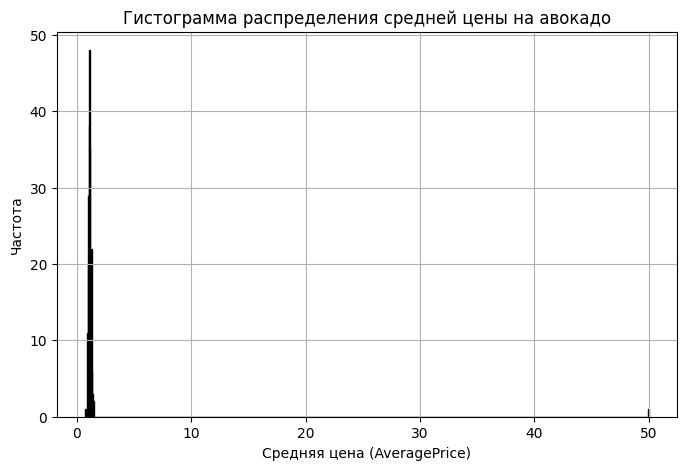

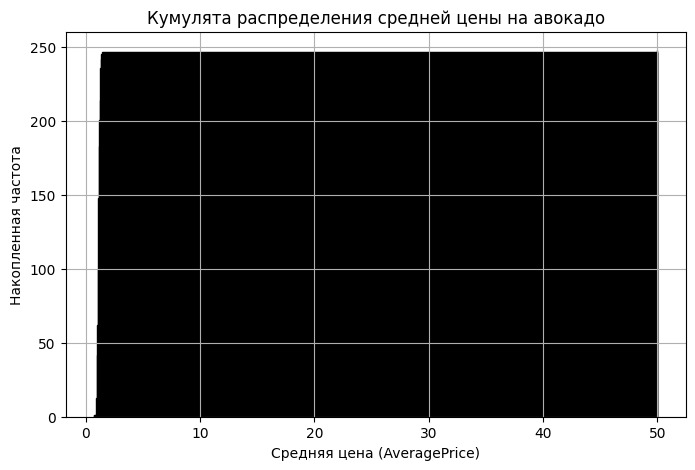

In [16]:
# 2 задание
import matplotlib.pyplot as plt

# Построение гистограммы
plt.figure(figsize=(8, 5))
plt.hist(data['AveragePrice'], bins=num_bins, edgecolor='black', color='lightcoral')
plt.title('Гистограмма распределения средней цены на авокадо')
plt.xlabel('Средняя цена (AveragePrice)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Построение кумуляты (накопленной гистограммы)
plt.figure(figsize=(8, 5))
plt.hist(data['AveragePrice'], bins=num_bins, edgecolor='black', cumulative=True, color='skyblue')
plt.title('Кумулята распределения средней цены на авокадо')
plt.xlabel('Средняя цена (AveragePrice)')
plt.ylabel('Накопленная частота')
plt.grid(True)
plt.show()

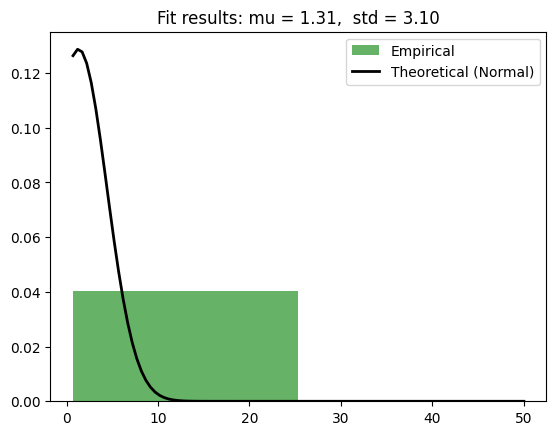

Теоретические частоты:
 [2.48000000e+02 1.86031711e-12]
Наблюдаемые частоты (гистограмма):
 [247   1]
Chi-squared statistic: 537542763811.9627
p-value: 0.0
p-value (0.0) < alpha (0.05): Гипотеза H0 отвергается.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare

data = pd.read_csv('avocado.csv')

# Выбор исследуемого параметра (средняя цена авокадо)
data = data['AveragePrice'].dropna()

# Эмпирическая оценка плотности распределения (гистограмма)
# Уменьшаем количество интервалов до 5 для минимизации нулевых частот
hist, bin_edges = np.histogram(data, bins=2, density=False)  # Гистограмма без нормировки

# Параметры нормального распределения (по выборке)
mu, std = np.mean(data), np.std(data)

# Построение гистограммы
plt.hist(data, bins=2, density=True, alpha=0.6, color='g', label='Empirical')

# Построение теоретической кривой нормального распределения
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Theoretical (Normal)')

plt.title(f"Fit results: mu = {mu:.2f},  std = {std:.2f}")
plt.legend()
plt.show()

# Преобразуем теоретическую плотность в частоты, соответствующие нашим интервалам
cdf_values = norm.cdf(bin_edges, mu, std)  # CDF для границ интервалов
theoretical_freq = len(data) * np.diff(cdf_values)  # Перевод в частоты (по интервалам)

# Приводим суммы наблюдаемых и теоретических частот к одному значению
observed_freq = hist
theoretical_freq *= observed_freq.sum() / theoretical_freq.sum()

# Проверка, что теоретические частоты не нулевые
print("Теоретические частоты:\n", theoretical_freq)
print("Наблюдаемые частоты (гистограмма):\n", observed_freq)

# Применение критерия хи-квадрат
# Применяем только для тех интервалов, где теоретическая частота > 0
nonzero_mask = (theoretical_freq > 0)
chi2_stat, p_value = chisquare(observed_freq[nonzero_mask], f_exp=theoretical_freq[nonzero_mask])

# Вывод результатов
print(f"Chi-squared statistic: {chi2_stat}")
print(f"p-value: {p_value}")

# Сравнение с уровнем значимости
alpha = 0.05
if p_value < alpha:
    print(f"p-value ({p_value}) < alpha ({alpha}): Гипотеза H0 отвергается.")
else:
    print(f"p-value ({p_value}) >= alpha ({alpha}): Нет оснований отвергать гипотезу H0.")


Результаты t-теста для первого набора данных (методы неразличимы):
T-statistic: -0.3325, P-value: 0.7396
P-value >= 0.05: Нет оснований отвергать H0 на уровне 0.05.
P-value >= 0.01: Нет оснований отвергать H0 на уровне 0.01.
P-value >= 0.001: Нет оснований отвергать H0 на уровне 0.001.

Результаты t-теста для второго набора данных (методы различимы):
T-statistic: -9.8469, P-value: 0.0000
P-value < 0.05: Различия статистически значимы на уровне 0.05.
P-value < 0.01: Различия статистически значимы на уровне 0.01.
P-value < 0.001: Различия статистически значимы на уровне 0.001.

Доверительные интервалы для первого набора данных (методы неразличимы):
Метод 1: (np.float64(48.66053562609521), np.float64(49.91563030994902))
Метод 2: (np.float64(48.70323550473114), np.float64(50.20448176497101))

Доверительные интервалы для второго набора данных (методы различимы):
Метод 1: (np.float64(49.306530617887276), np.float64(50.5610763817765))
Метод 2: (np.float64(54.10344923905536), np.float64(55.612

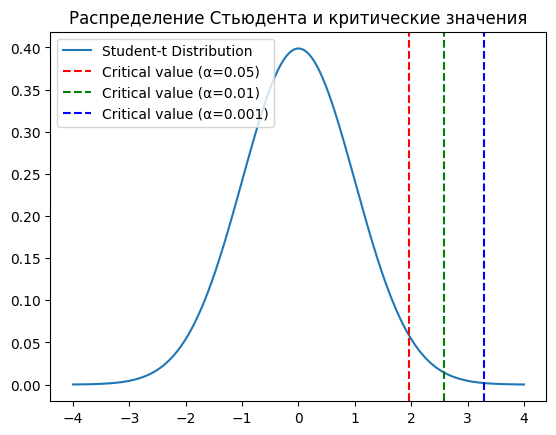

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Генерация данных

N = 1000 

# Первый набор данных 
mean1_method1, mean1_method2 = 50, 50  # Одинаковые средние значения
std1_method1, std1_method2 = 10, 12  # Разные стандартные отклонения

method1_data1 = np.random.normal(mean1_method1, std1_method1, N)
method2_data1 = np.random.normal(mean1_method2, std1_method2, N)

# Второй набор данных
mean2_method1, mean2_method2 = 50, 55  # Разные средние значения
std2_method1, std2_method2 = 10, 12  # Разные стандартные отклонения

method1_data2 = np.random.normal(mean2_method1, std2_method1, N)
method2_data2 = np.random.normal(mean2_method2, std2_method2, N)

# Проверка статистической значимости

# Функция для вывода результатов t-теста для заданных уровней значимости
def t_test_results(data1, data2, alpha_levels):
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    for alpha in alpha_levels:
        if p_value < alpha:
            print(f"P-value < {alpha}: Различия статистически значимы на уровне {alpha}.")
        else:
            print(f"P-value >= {alpha}: Нет оснований отвергать H0 на уровне {alpha}.")

# Уровни значимости
alpha_levels = [0.05, 0.01, 0.001]

print("Результаты t-теста для первого набора данных (методы неразличимы):")
t_test_results(method1_data1, method2_data1, alpha_levels)

print("\nРезультаты t-теста для второго набора данных (методы различимы):")
t_test_results(method1_data2, method2_data2, alpha_levels)

# Доверительные интервалы
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - h, mean + h

# Вывод доверительных интервалов для обоих наборов данных
print("\nДоверительные интервалы для первого набора данных (методы неразличимы):")
ci1_method1 = confidence_interval(method1_data1)
ci1_method2 = confidence_interval(method2_data1)
print(f"Метод 1: {ci1_method1}")
print(f"Метод 2: {ci1_method2}")

print("\nДоверительные интервалы для второго набора данных (методы различимы):")
ci2_method1 = confidence_interval(method1_data2)
ci2_method2 = confidence_interval(method2_data2)
print(f"Метод 1: {ci2_method1}")
print(f"Метод 2: {ci2_method2}")

# Построение графика распределения Стьюдента и критических значений
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=N-1)

plt.plot(x, y, label='Student-t Distribution')
plt.axvline(stats.t.ppf(1-0.025, df=N-1), color='r', linestyle='--', label='Critical value (α=0.05)')
plt.axvline(stats.t.ppf(1-0.005, df=N-1), color='g', linestyle='--', label='Critical value (α=0.01)')
plt.axvline(stats.t.ppf(1-0.0005, df=N-1), color='b', linestyle='--', label='Critical value (α=0.001)')
plt.title("Распределение Стьюдента и критические значения")
plt.legend()
plt.show()
